In [85]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


from subprocess import check_output

In [86]:
housedata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")     # Importing training dataset using pd.read_csv

In [87]:

housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [88]:
print(housedata.columns)
housedata.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
housedata.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**2. Data Manipulation and Visualization**

Lets check for NaN (null) values in the data

In [90]:
#Removing the null values
nulls = pd.DataFrame(housedata.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [91]:
# Pool null value refers to no pool area
print ("Unique values are:", housedata.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [92]:
#Analysing the non numeric data 
categoricals = housedata.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Skew is: 1.8828757597682129


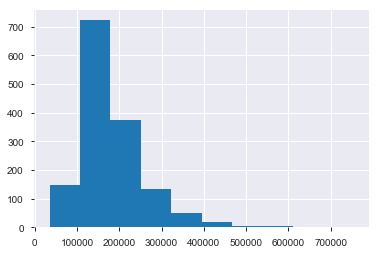

Skew is: 0.12134661989685333


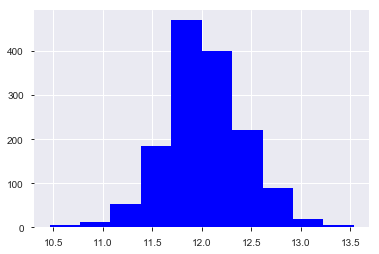

In [94]:
# Determining the Skewness of data viz. target variable
print ("Skew is:", housedata.SalePrice.skew())
plt.hist(housedata.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
housedata['Skewed_SP'] = np.log(housedata['SalePrice']+1)
print ("Skew is:", housedata['Skewed_SP'].skew())
plt.hist(housedata['Skewed_SP'], color='blue')
plt.show()

Unique Neighborhood values are: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


G:\Smita_User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


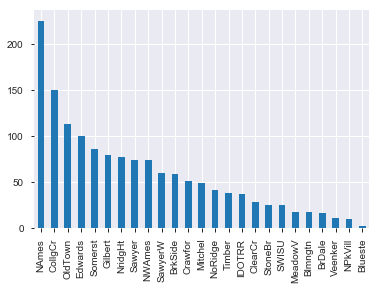

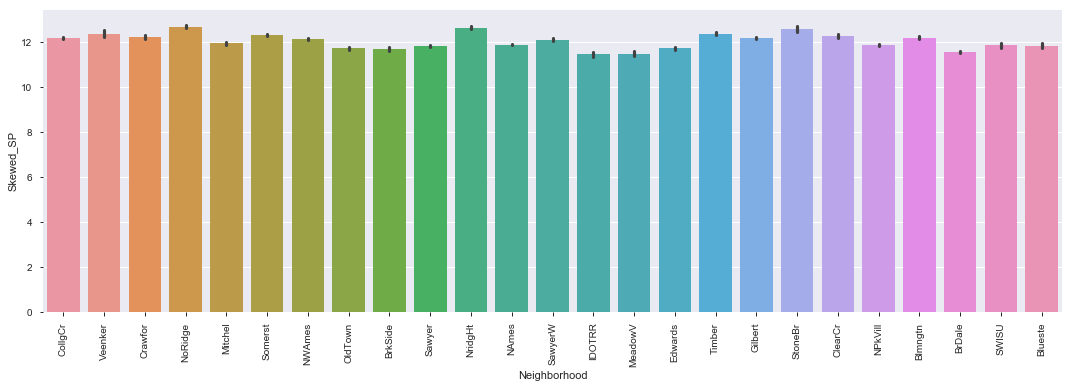

In [95]:
''' Neighbourhood colu mn analysis'''

print ("Unique Neighborhood values are:", housedata.Neighborhood.unique())
housedata['Neighborhood'].value_counts().plot(kind='bar')

g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=housedata, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64


G:\Smita_User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


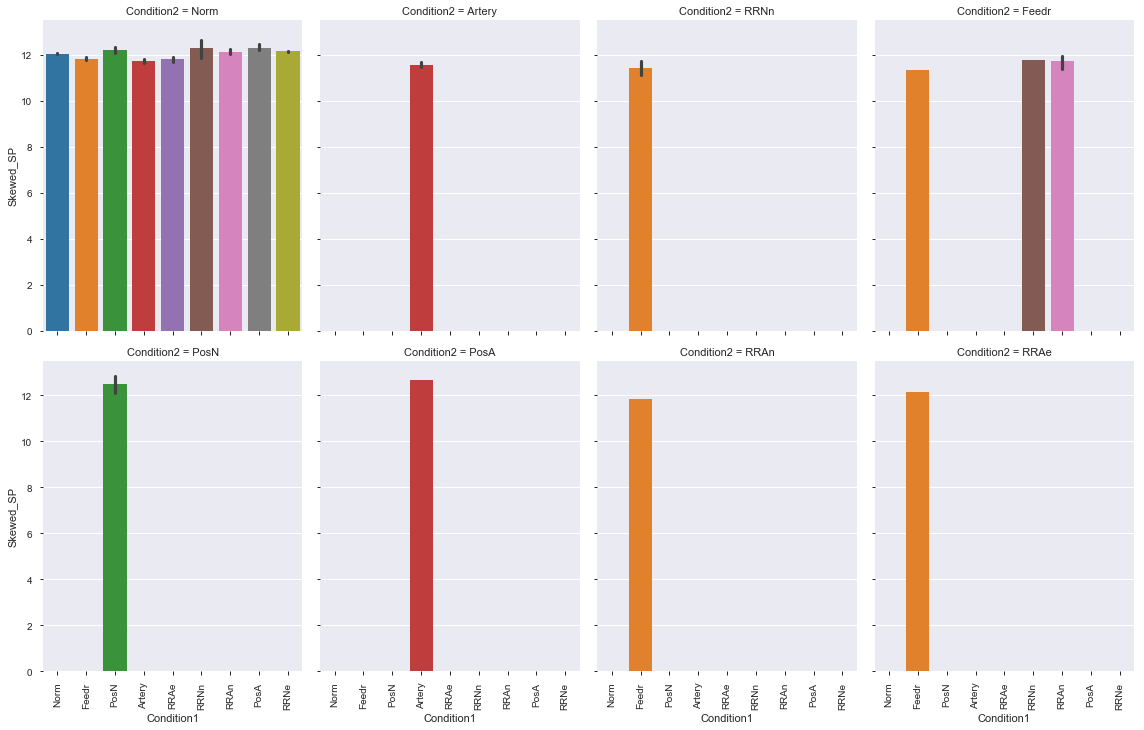

In [96]:
print(housedata['Condition1'].value_counts())
print(housedata['Condition2'].value_counts())

g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=housedata, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


G:\Smita_User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


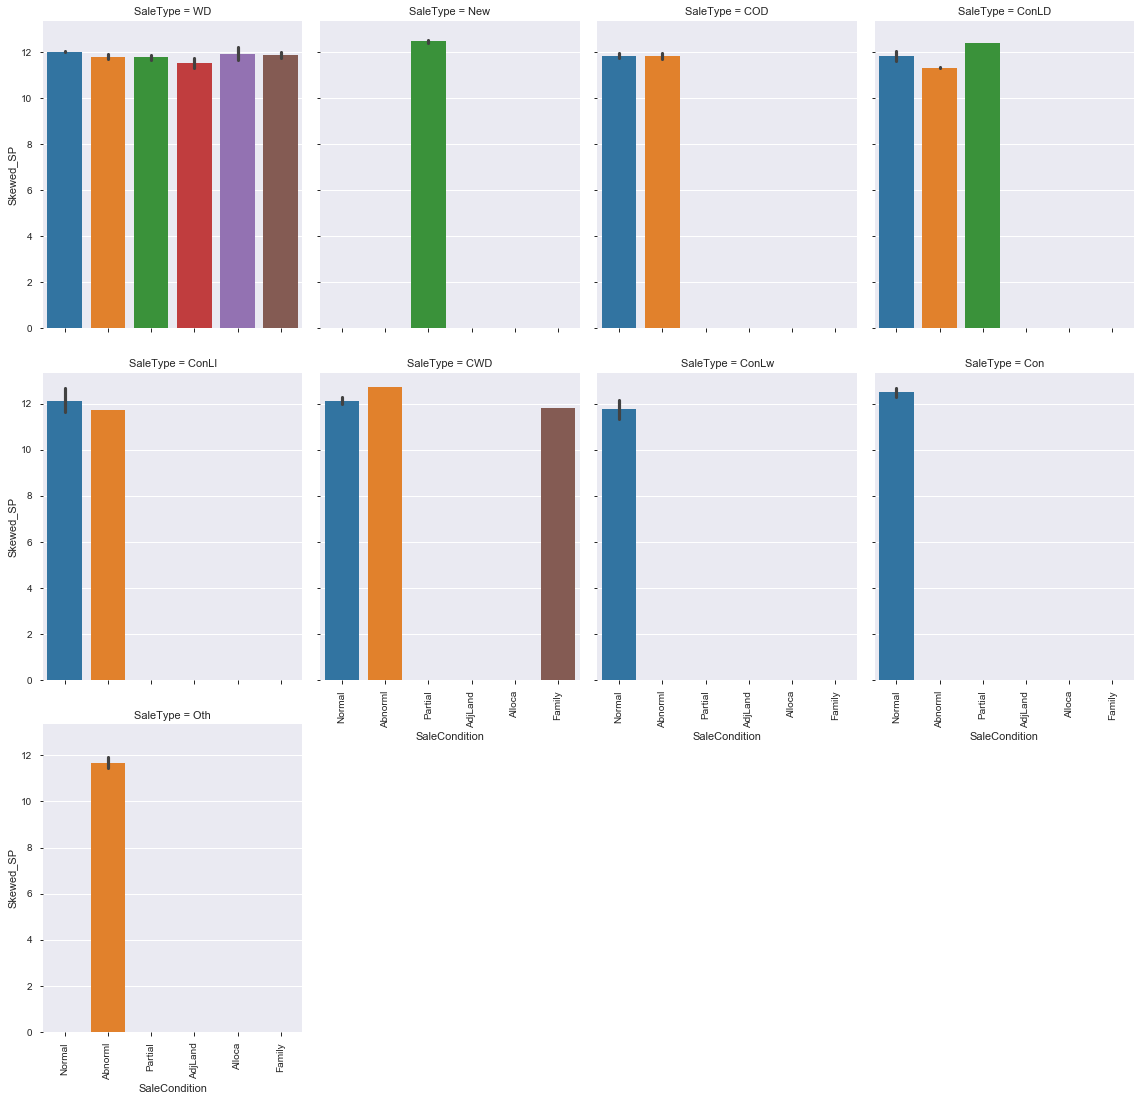

In [97]:
print(housedata['SaleCondition'].value_counts())
print(housedata['SaleType'].value_counts())

g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=housedata, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)


G:\Smita_User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
G:\Smita_User\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

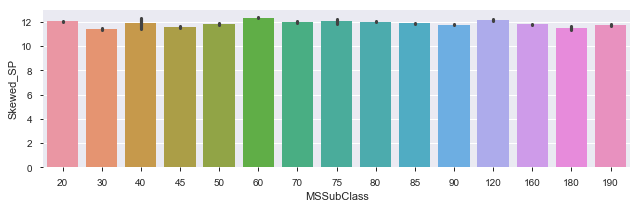

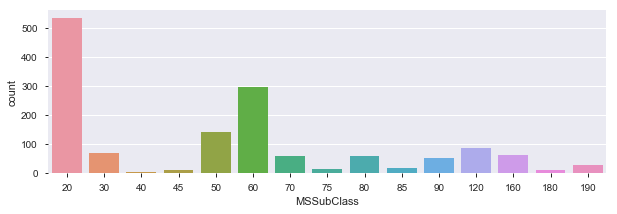

In [99]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=housedata,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=housedata)
housedata['MSSubClass'].value_counts()

In [100]:
housedata.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageCond         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofStyle           0
RoofMatl            0
ExterQual           0
Exterior1st         0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
Skewed_SP           0
OverallCond         0
                 ... 
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
ScreenPorch         0
Functional          0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
Fireplaces          0
TotRmsAbvGrd        0
BsmtUnfSF           0
LowQualFin

In [101]:
REMOVING_THRESH = 0.8

total = housedata.isnull().sum().sort_values(ascending=False)
percent = (housedata.isnull().sum()/housedata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))

#MDV: remove the feature that has more than 10% of missing values
print("We are going to remove the below features : ")
print(missing_data[missing_data['Percent'] > REMOVING_THRESH])

housedata = housedata.drop((missing_data[missing_data['Percent'] > REMOVING_THRESH]).index,1)

print("After removed data the new dim of all_data are")
print(housedata.shape)

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageQual       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageType       81  0.055479
We are going to remove the below features : 
             Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
After removed data the new dim of all_data are
(1460, 78)


In [102]:

numerical_features = housedata.select_dtypes(include=["float","int","bool"]).columns.values
categorical_features = housedata.select_dtypes(include=["object"]).columns.values


In [103]:
print("numerical_features", numerical_features)
print("categorical_features",categorical_features)
housedata.columns
housedata[housedata['TotalBsmtSF']== 0].index

numerical_features ['LotFrontage' 'MasVnrArea' 'GarageYrBlt' 'Skewed_SP']
categorical_features ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'SaleType' 'SaleCondition']


Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [ ]:
''' Filling the values for Total basement SF where values not available or zero'''
no_basement_houses_index = housedata[housedata['TotalBsmtSF']== 0].index
housedata['TotalBsmtSF'].loc[no_basement_houses_index] = housedata['GrLivArea'].loc[no_basement_houses_index]


In [ ]:
# Add the living areas and basement aread to create a new feature TotArea
housedata["TotArea"] = housedata["GrLivArea"] + housedata["TotalBsmtSF"]



In [ ]:
X = housedata.loc[:,housedata.columns != 'Survived']
X.head()

In [86]:
#Remove outliers from the training set only

#print(train.sort_values(by = 'GrLivArea', ascending = False)[:2])
print(train[train['GrLivArea'] > 4000].index)
#train = train.drop(train[train['Id'] == 1299].index)
#train = train.drop(train[train['Id'] == 524].index)

train = train.drop(train[train['GrLivArea'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF']> 6000].index)

#train = train.reset_index()

#print(train['GrLivArea'])

# remove outlier for LotFrontage and mean imputation
train = train.drop(train[train['LotFrontage']>150].index)
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

# Removing outlier for LotArea and transforming
train = train.drop(train[train['LotArea']>50001].index)


Id                 0
SaleCondition      0
Heating            0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
BsmtUnfSF          0
3SsnPorch          0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
                ... 
Condition1         0
Condition2         0
HouseStyle         0
OverallQual        0
OverallCond        0
BldgType           0
YearRemodAdd       0
Foundation         0
ExterCond          0
ExterQual          0
YearBuilt          0
Exterior2nd        0
Exterior1st        0
SalePrice          0
RoofMatl           0
RoofStyle          0
Electrical   

In [87]:


house_data = house_data.drop(['Electrical','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
                             'BsmtFinType1','BsmtExposure','BsmtFinType2','GarageCond',
                             'GarageQual','GarageFinish','GarageType','GarageYrBlt','GarageYrBlt'], axis = 1)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [53]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = house_data.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing_houseData.html")



In [88]:
house_data.drop(['PoolQC','PoolArea','3SsnPorch','LowQualFinSF','MiscVal','MiscFeature',
                 'Alley','ScreenPorch','BsmtFinSF2','EnclosedPorch','Fence'], axis = 1,inplace=True)

KeyError: "['PoolQC' 'MiscFeature' 'Alley' 'Fence'] not found in axis"

In [89]:
house_data.shape

(1460, 63)

In [90]:
'''#finding percentage of missing data'''
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(10)


,total,percent
LotFrontage,259,0.177397
SalePrice,0,0.000000
HouseStyle,0,0.000000
BsmtFinSF2,0,0.000000
BsmtFinSF1,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000


In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

#sns.heatmap(house_data.corr(), annot=True) 


<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

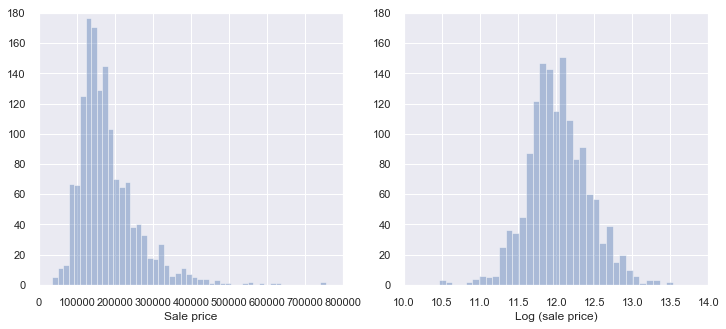

In [91]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(house_data['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(house_data['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

df=house_data


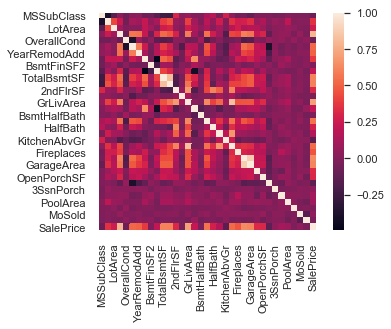

In [92]:


corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)



In [93]:


corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list



OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

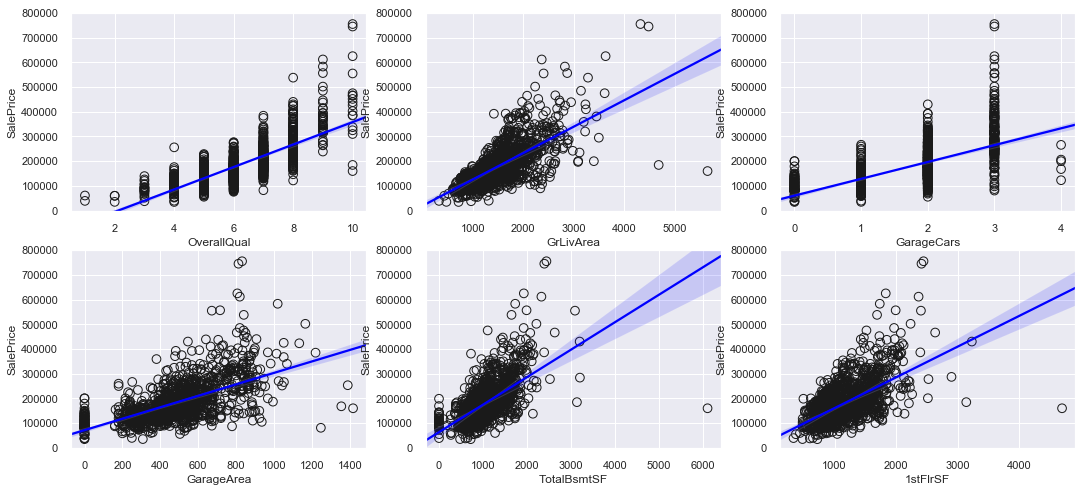

In [94]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = df,scatter=False, color = 'Blue')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

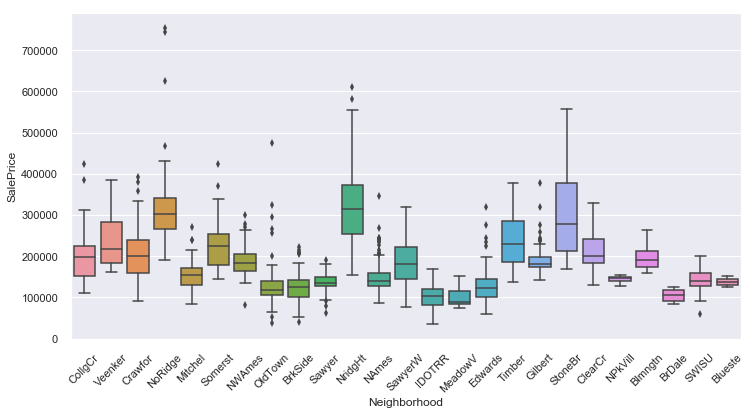

In [95]:


plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)



In [98]:
!dir

 Volume in drive C is System
 Volume Serial Number is 0E8F-BE18

 Directory of C:\Users\get_s\myPython\house_pricing_project

04-01-2020  23:45    <DIR>          .
04-01-2020  23:45    <DIR>          ..
04-01-2020  23:45    <DIR>          .ipynb_checkpoints
04-01-2020  18:27           742,018 capstone_doc.pdf
04-01-2020  23:45           633,645 HousePricePrediction.ipynb
03-01-2020  22:35             3,190 houseprices.txt
03-01-2020  22:35           460,676 house_data.csv
04-01-2020  19:06        14,083,023 Introduction to Computation and Programming using Python (rev. ed.).pdf
04-01-2020  18:04         5,844,527 profiling_before_preprocessing_houseData.html
04-01-2020  18:53           460,633 Untitled.ipynb
               7 File(s)     22,227,712 bytes
               3 Dir(s)  67,801,776,128 bytes free
